## Supervised Learning Capstone Project - Census Income Data

The prominent inequality of income continues to be a pressing problem especially in the United States despite federal laws protecting against pay discrimination by race, ethnicity, and gender. 

### Data Set

The UCI Census Income Dataset has been used for the purpose. Classification has been done to predict whether a person's annual income in US falls in the income category of either greater than 50K Dollars or less equal to 50K Dollars
category based on a certain set of demographic and employment related attributes.

This data set contains weighted census data extracted from the 1994 and 1995 current population surveys conducted by the U.S. Census Bureau. 

Some of the key attributes information:

1. **age**: continuous. 
2. **class_of_worker**: Private, Self-emp-not-inc, Self-emp-inc, Federal-gov, Local-gov, State-gov, Without-pay, Never-worked. 
3. **education**: Bachelors, Some-college, 11th, HS-grad, Prof-school, Assoc-acdm, Assoc-voc, 9th, 7th-8th, 12th, Masters, 1st-4th, 10th, Doctorate, 5th-6th, Preschool. 
4. **wage_per_hour**: continuous. 
5. **marital-status**: Married-civ-spouse, Divorced, Never-married, Separated, Widowed, Married-spouse-absent, Married-AF-spouse. 
6. **major_occupation_code**: Tech-support, Craft-repair, Other-service, Sales, Exec-managerial, Prof-specialty, Handlers-cleaners, Machine-op-inspct, Adm-clerical, Farming-fishing, Transport-moving, Priv-house-serv, Protective-serv, Armed-Forces. 
7. **relationship**: Wife, Own-child, Husband, Not-in-family, Other-relative, Unmarried. 
8. **race**: White, Asian-Pac-Islander, Amer-Indian-Eskimo, Other, Black. 
9. **sex**: Female, Male. 
10. **capital-gain**: continuous. 
11. **capital-loss**: continuous. 
12. **weeks_worked_in_year**: continuous. 

## Problem Statement

Given various features, the aim is to build a predictive model to determine the income level for people in US. The income levels are binned at below 50K and above 50K

## Important Analytical Questions

To get a feel of what this project intends to produce, we will ask three analytical questions that should fixate our efforts and reveal what the reader can expect to find after reading and walking through our project:

#### 1. What features, within the provided dataset, are most determinant of a project's success or failure?
#### 2. Which prediction models or *algorithms* perform best in terms of speed, accuracy, and explainability combined?
#### 3. How good is our trained model in predicting future projects?

The first question will be answered once we are done with the feature engineering phase, where we derive, transform and select features from the *variables* or *columns* we have in this dataset. 

The latter two questions will be answered in the last phase, where we select and test our prediction models.


In [ ]:
from IPython.display import HTML

HTML('''<script>
code_show=true;
function code_toggle() {
if (code_show){
$('div.input').hide();
} else {
$('div.input').show();
}
code_show = !code_show
}
$( document ).ready(code_toggle);
</script>
The code for this notebook is hidden for easier reading.
To toggle it on/off, please click <a href="javascript:code_toggle()">here</a>.''')


### Exploratory Data Analysis ###

#### Import Libraries ####

In [1]:
import numpy as np
import pandas as pd
import matplotlib as mp
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression, LassoLarsIC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.tree import DecisionTreeClassifier,DecisionTreeRegressor
from sklearn.model_selection import train_test_split,cross_val_score,GridSearchCV
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier,BaggingClassifier,ExtraTreesClassifier, GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report,roc_curve, auc
from datetime import datetime
from sklearn.feature_selection import RFE
from scipy import interp
from sklearn import datasets, neighbors
from sklearn.metrics import auc, roc_curve
from sklearn.model_selection import StratifiedKFold

from imblearn.over_sampling import ADASYN, SMOTE, RandomOverSampler
from imblearn.pipeline import make_pipeline

# Display preferences.
from IPython.display import Markdown, display
%matplotlib inline
pd.options.display.float_format = '{:.3f}'.format

def printmd(string):
    "prints text in bold"
    display(Markdown(string))


import warnings
warnings.filterwarnings(action="ignore")

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

#### Load Data ####

In [2]:
census=pd.read_csv("census_income_data.csv")
#census=pd.read_csv("sample1.csv")
census.head(5)

,age,class_of_worker,industry_code,occupation_code,education,wage_per_hour,enrolled_in_edu_inst_lastwk,marital_status,major_industry_code,major_occupation_code,...,country_father,country_mother,country_self,citizenship,business_or_self_employed,fill_questionnaire_veteran_admin,veterans_benefits,weeks_worked_in_year,year,income_level
0,73,Not in universe,0,0,High school graduate,0,Not in universe,Widowed,Not in universe or children,Not in universe,...,United-States,United-States,United-States,Native- Born in the United States,0,Not in universe,2,0,95,-50000
1,58,Self-employed-not incorporated,4,34,Some college but no degree,0,Not in universe,Divorced,Construction,Precision production craft & repair,...,United-States,United-States,United-States,Native- Born in the United States,0,Not in universe,2,52,94,-50000
2,18,Not in universe,0,0,10th grade,0,High school,Never married,Not in universe or children,Not in universe,...,Vietnam,Vietnam,Vietnam,Foreign born- Not a citizen of U S,0,Not in universe,2,0,95,-50000
3,9,Not in universe,0,0,Children,0,Not in universe,Never married,Not in universe or children,Not in universe,...,United-States,United-States,United-States,Native- Born in the United States,0,Not in universe,0,0,94,-50000
4,10,Not in universe,0,0,Children,0,Not in universe,Never married,Not in universe or children,Not in universe,...,United-States,United-States,United-States,Native- Born in the United States,0,Not in universe,0,0,94,-50000


#### Data Exploration ####

In [3]:
census.shape

(199523, 41)

In [4]:
census['income_level'].value_counts()

-50000    187141
 50000     12382
Name: income_level, dtype: int64

In [5]:
census.dtypes

age                                  int64
class_of_worker                     object
industry_code                        int64
occupation_code                      int64
education                           object
wage_per_hour                        int64
enrolled_in_edu_inst_lastwk         object
marital_status                      object
major_industry_code                 object
major_occupation_code               object
race                                object
hispanic_origin                     object
sex                                 object
member_of_labor_union               object
reason_for_unemployment             object
full_parttime_employment_stat       object
capital_gains                        int64
capital_losses                       int64
dividend_from_Stocks                 int64
tax_filer_status                    object
region_of_previous_residence        object
state_of_previous_residence         object
d_household_family_stat             object
d_household

In [6]:
#Separate categorical and numberical columns
cat_col = census.dtypes[census.dtypes == 'object']
num_col = census.dtypes[census.dtypes != 'object']

In [7]:
for col in list(cat_col.index):
    print(f"--------------------{col.title()}-------------------------")
    total= census[col].value_counts()
    percent = census[col].value_counts() / census.shape[0]
    cat_df = pd.concat([total,percent],keys = ['total','percent'],axis = 1)
    print(cat_df)
    print('\n')

--------------------Class_Of_Worker-------------------------
                                 total  percent
Not in universe                 100245    0.502
Private                          72028    0.361
Self-employed-not incorporated    8445    0.042
Local government                  7784    0.039
State government                  4227    0.021
Self-employed-incorporated        3265    0.016
Federal government                2925    0.015
Never worked                       439    0.002
Without pay                        165    0.001


--------------------Education-------------------------
                                        total  percent
High school graduate                    48407    0.243
Children                                47422    0.238
Some college but no degree              27820    0.139
Bachelors degree(BA AB BS)              19865    0.100
7th and 8th grade                        8007    0.040
10th grade                               7557    0.038
11th grade       

Different division same region    465    0.002


--------------------Migration_Within_Reg-------------------------
                              total  percent
Nonmover                      82538    0.414
Same county                    9812    0.049
Different county same state    2797    0.014
Not in universe                1516    0.008
Different state in South        973    0.005
Different state in West         679    0.003
Different state in Midwest      551    0.003
Abroad                          530    0.003
Different state in Northeast    431    0.002


--------------------Live_1_Year_Ago-------------------------
                                   total  percent
Not in universe under 1 year old  101212    0.507
Yes                                82538    0.414
No                                 15773    0.079


--------------------Migration_Sunbelt-------------------------
                 total  percent
Not in universe  84054    0.421
No                9987    0.050
Yes        

In [8]:
census.duplicated().sum()

46627

#### Findings/Observations ####

We see that census_income_data has 199523 observations and 41 demographic and employment related features. The target variable is the "Income Level". Note that Income Level have been binned at the $50K level to present a binary classification problem.

After reviewing the categorical features, here are the findings that needs to be addressed in data cleaning process.

**`Class_Of_Worker, Enrolled_In_Edu_Inst_Lastwk, Major_Industry_Code, Major_Occupation_Code, Member_Of_Labor_Union, Reason_For_Unemployment, Region_Of_Previous_Residence,  State_Of_Previous_Residence, Migration_MSA, Migration_Reg, Migration_Within_Reg, Live_1_Year_Ago, Migration_Sunbelt, Family_Members_Under_18, Fill_Questionnaire_Veteran_Admin`**
- has unknown values represented by 'Not in universe', 'Not in universe or children' and 'Not in universe under 1 year old' .

**`State_Of_Previous_Residence, Migration_MSA, Migration_Reg, Migration_Within_Reg, Migration_Sunbelt, Country_Father, Country_Mother, Country_Self`**
- has unknown values represented by '?'.

**`Education`**
- High school graduate, 9th grade, 10th grade, 11th grade and 12th grade no diploma an be categorized as  High School
- Less than 1st grade, 1st 2nd 3rd or 4th grade can be categorized as Elementary School.
- 5th or 6th grade and 7th and 8th grade can be categorized as Middle School.
- Associates degree-occup /vocational and Associates degree-academic programcan be categorized as Associate Degree.
- Children constitues 29% of the data.

**`Marital Status`**
- Married-A F spouse present, Married-civilian spouse presentand Married-spouse absent can be categorized as Married.
- Divorced and Separated again falls under category Separated.

**`Class_Of_Worker`**
- Self-employed-incorporated and Self-employed-not-incorporated can be categorized as Self-employed.
- Federal government, State government and Local government an be categorized as Goverment employees.

**`Tax_Filer_Status`**
- Joint both 65+, Joint both under 65 and Joint one under 65 & one 65+ can be categorized as Joint Filer.


#### Data Cleaning ####

In [9]:
# get a list of columns
cols = list(census)

# move the column to head of list using index, pop and insert
cols.insert(0, cols.pop(cols.index('income_level')))

# use ix to reorder
census = census.ix[:, cols]


In [10]:
# Strip  to strip whitespace from all the columns.
col_names = {k:k.replace(k,k.strip()) for k in census.columns}
census.rename(columns=col_names,inplace=True)


In [11]:
# Create a dictionary containing the value to replace in each column
data = census.copy()
data['income_level'].value_counts()

-50000    187141
 50000     12382
Name: income_level, dtype: int64

In [12]:
# Binarize the target variable Rating.
data.income_level = data.income_level.apply(lambda x: 0 if x < 0 else 1)
data['income'] = data.income_level.apply(lambda x: "Income>=$50K" if x > 0 else "Income<$50K")


In [13]:
#data = data.apply(lambda x: x.str.strip('-') if x.dtype == "object" else x)

data.major_occupation_code = data.major_occupation_code.apply(lambda x: x.replace('&',''))
data.d_household_family_stat = data.d_household_family_stat.apply(lambda x: x.replace('<18','under 18'))
data.d_household_family_stat = data.d_household_family_stat.apply(lambda x: x.replace('18+','over 18'))
data.citizenship = data.citizenship.apply(lambda x: x.replace('(s)','s'))


In [14]:
data

,income_level,age,class_of_worker,industry_code,occupation_code,education,wage_per_hour,enrolled_in_edu_inst_lastwk,marital_status,major_industry_code,...,country_father,country_mother,country_self,citizenship,business_or_self_employed,fill_questionnaire_veteran_admin,veterans_benefits,weeks_worked_in_year,year,income
0,0,73,Not in universe,0,0,High school graduate,0,Not in universe,Widowed,Not in universe or children,...,United-States,United-States,United-States,Native- Born in the United States,0,Not in universe,2,0,95,Income<$50K
1,0,58,Self-employed-not incorporated,4,34,Some college but no degree,0,Not in universe,Divorced,Construction,...,United-States,United-States,United-States,Native- Born in the United States,0,Not in universe,2,52,94,Income<$50K
2,0,18,Not in universe,0,0,10th grade,0,High school,Never married,Not in universe or children,...,Vietnam,Vietnam,Vietnam,Foreign born- Not a citizen of U S,0,Not in universe,2,0,95,Income<$50K
3,0,9,Not in universe,0,0,Children,0,Not in universe,Never married,Not in universe or children,...,United-States,United-States,United-States,Native- Born in the United States,0,Not in universe,0,0,94,Income<$50K
4,0,10,Not in universe,0,0,Children,0,Not in universe,Never married,Not in universe or children,...,United-States,United-States,United-States,Native- Born in the United States,0,Not in universe,0,0,94,Income<$50K
5,0,48,Private,40,10,Some college but no degree,1200,Not in universe,Married-civilian spouse present,Entertainment,...,Philippines,United-States,United-States,Native- Born in the United States,2,Not in universe,2,52,95,Income<$50K
6,0,42,Private,34,3,Bachelors degree(BA AB BS),0,Not in universe,Married-civilian spouse present,Finance insurance and real estate,...,United-States,United-States,United-States,Native- Born in the United States,0,Not in universe,2,52,94,Income<$50K
7,0,28,Private,4,40,High school graduate,0,Not in universe,Never married,Construction,...,United-States,United-States,United-States,Native- Born in the United States,0,Not in universe,2,30,95,Income<$50K
8,0,47,Local government,43,26,Some college but no degree,876,Not in universe,Married-civilian spouse present,Education,...,United-States,United-States,United-States,Native- Born in the United States,0,Not in universe,2,52,95,Income<$50K
9,0,34,Private,4,37,Some college but no degree,0,Not in universe,Married-civilian spouse present,Construction,...,United-States,United-States,United-States,Native- Born in the United States,0,Not in universe,2,52,94,Income<$50K


In [15]:
# Strip  to # Strip  to strip whitespace from all data item that is object/string like.
data = data.apply(lambda x: x.str.strip() if x.dtype == "object" else x)
data = data.replace({'Mexican (Mexicano)':'Mexican','Outlying-U S (Guam USVI etc)':'Outlying US','Not in universe':'Unknown', 'Not in universe or children':'Unknown','Not in universe under 1 year old':'Unknown'})

In [16]:
hs_grad = ['High school graduate','9th grade','10th grade','11th grade','12th grade no diploma']
elementary = ['Less than 1st grade','1st 2nd 3rd or 4th grade']
middle = ['5th or 6th grade','7th and 8th grade']
associate = ['Associates degree-occup /vocational','Associates degree-academic program']

# replace elements in list.
data['education'].replace(to_replace = hs_grad,value = 'High School',inplace = True)
data['education'].replace(to_replace = elementary,value = 'Elementary School',inplace = True)
data['education'].replace(to_replace = middle,value = 'Middle School',inplace = True)
data['education'].replace(to_replace = associate,value = 'Associate Degree',inplace = True)
data = data.replace({'Doctorate degree(PhD EdD)':'Doctorate degree', 'Masters degree(MA MS MEng MEd MSW MBA)':'Masters degree', 'Prof school degree (MD DDS DVM LLB JD)':'Prof school degree','Bachelors degree(BA AB BS)':'Bachelors degre'})

data['education'].value_counts()

High School                   71196
Children                      47422
Some college but no degree    27820
Bachelors degre               19865
Middle School                 11284
Associate Degree               9721
Masters degree                 6541
Elementary School              2618
Prof school degree             1793
Doctorate degree               1263
Name: education, dtype: int64

In [17]:
married= ['Married-A F spouse present','Married-civilian spouse present','Married-spouse absent']
separated = ['Separated','Divorced']
single = ['Never married']

#replace elements in list.
data['marital_status'].replace(to_replace = married ,value = 'Married',inplace = True)
data['marital_status'].replace(to_replace = separated,value = 'Separated',inplace = True)
data['marital_status'].replace(to_replace = single,value = 'Single',inplace = True)

data['marital_status'].value_counts()

Single       86485
Married      86405
Separated    16170
Widowed      10463
Name: marital_status, dtype: int64

In [18]:
self_employed = ['Self-employed-incorporated','Self-employed-not incorporated']
govt_employees = ['Federal government','State government','Local government']

#replace elements in list.
data['class_of_worker'].replace(to_replace = self_employed ,value = 'Self_employed',inplace = True)
data['class_of_worker'].replace(to_replace = govt_employees,value = 'Govt_employees',inplace = True)

data['class_of_worker'].value_counts()

Unknown           100245
Private            72028
Govt_employees     14936
Self_employed      11710
Never worked         439
Without pay          165
Name: class_of_worker, dtype: int64

In [19]:
joint = ['Joint both 65+','Joint both under 65', 'Joint one under 65 & one 65+']

#replace elements in list.
data['tax_filer_status'].replace(to_replace = joint ,value = 'Joint Filer',inplace = True)

data['tax_filer_status'].value_counts()

Joint Filer          79582
Nonfiler             75094
Single               37421
Head of household     7426
Name: tax_filer_status, dtype: int64

In [20]:
for col in list(cat_col.index):
    print(f"--------------------{col.title()}-------------------------")
    total= data[col].value_counts()
    percent = data[col].value_counts() / data.shape[0]
    cat_df = pd.concat([total,percent],keys = ['total','percent'],axis = 1)
    print(cat_df)
    print('\n')

--------------------Class_Of_Worker-------------------------
                 total  percent
Unknown         100245    0.502
Private          72028    0.361
Govt_employees   14936    0.075
Self_employed    11710    0.059
Never worked       439    0.002
Without pay        165    0.001


--------------------Education-------------------------
                            total  percent
High School                 71196    0.357
Children                    47422    0.238
Some college but no degree  27820    0.139
Bachelors degre             19865    0.100
Middle School               11284    0.057
Associate Degree             9721    0.049
Masters degree               6541    0.033
Elementary School            2618    0.013
Prof school degree           1793    0.009
Doctorate degree             1263    0.006


--------------------Enrolled_In_Edu_Inst_Lastwk-------------------------
                        total  percent
Unknown                186943    0.937
High school              6892   

                  total  percent
Nonmover          82538    0.414
MSA to MSA        10601    0.053
NonMSA to nonMSA   2811    0.014
Unknown            1516    0.008
MSA to nonMSA       790    0.004
NonMSA to MSA       615    0.003
Abroad to MSA       453    0.002
Not identifiable    430    0.002
Abroad to nonMSA     73    0.000


--------------------Migration_Reg-------------------------
                                total  percent
Nonmover                        82538    0.414
Same county                      9812    0.049
Different county same state      2797    0.014
Unknown                          1516    0.008
Different region                 1178    0.006
Different state same division     991    0.005
Abroad                            530    0.003
Different division same region    465    0.002


--------------------Migration_Within_Reg-------------------------
                              total  percent
Nonmover                      82538    0.414
Same county                 

In [21]:
data.head()

,income_level,age,class_of_worker,industry_code,occupation_code,education,wage_per_hour,enrolled_in_edu_inst_lastwk,marital_status,major_industry_code,...,country_father,country_mother,country_self,citizenship,business_or_self_employed,fill_questionnaire_veteran_admin,veterans_benefits,weeks_worked_in_year,year,income
0,0,73,Unknown,0,0,High School,0,Unknown,Widowed,Unknown,...,United-States,United-States,United-States,Native- Born in the United States,0,Unknown,2,0,95,Income<$50K
1,0,58,Self_employed,4,34,Some college but no degree,0,Unknown,Separated,Construction,...,United-States,United-States,United-States,Native- Born in the United States,0,Unknown,2,52,94,Income<$50K
2,0,18,Unknown,0,0,High School,0,High school,Single,Unknown,...,Vietnam,Vietnam,Vietnam,Foreign born- Not a citizen of U S,0,Unknown,2,0,95,Income<$50K
3,0,9,Unknown,0,0,Children,0,Unknown,Single,Unknown,...,United-States,United-States,United-States,Native- Born in the United States,0,Unknown,0,0,94,Income<$50K
4,0,10,Unknown,0,0,Children,0,Unknown,Single,Unknown,...,United-States,United-States,United-States,Native- Born in the United States,0,Unknown,0,0,94,Income<$50K


In [22]:
data.shape

(199523, 42)

In [23]:
#count missing values
missing_vals = (data.isnull().sum()/len(data)).sort_values(ascending=False)

# keep column names that do have them
missing_vals = missing_vals[missing_vals > 0]

# data types
missValDTypes = data[missing_vals.index.to_list()].dtypes

printmd("**Missing value percentages:** Total values: {}".format(len(data)))
print(missing_vals, '\n')

**Missing value percentages:** Total values: 199523

migration_sunbelt             0.500
migration_within_reg          0.500
migration_msa                 0.500
migration_reg                 0.500
country_father                0.034
country_mother                0.031
country_self                  0.017
hispanic_origin               0.004
state_of_previous_residence   0.004
dtype: float64 



In [24]:
# Columns to be dropped
drop_cols = missing_vals[:4].index.to_list()
#drop_cols.extend(['wage_per_hour'])

drop_cols

['migration_sunbelt', 'migration_within_reg', 'migration_msa', 'migration_reg']

In [25]:
# Columns for data cleaning
data_clean_cols = missing_vals[4:].index.to_list()

data_clean_cols

['country_father',
 'country_mother',
 'country_self',
 'hispanic_origin',
 'state_of_previous_residence']

In [26]:
# Drop columns marked for removal and treat the NaN values
data.drop(columns=drop_cols, inplace=True)
data = data.replace([np.inf, -np.inf], np.nan).dropna(how="all")

In [27]:
# drop rows with age 90
print("Number of age observation before removing:",data.shape)
index_age = data[data['age'] == 90].index
data.drop(labels = index_age,axis = 0,inplace =True)
index_education = data[data['education'] == 'Children'].index
data.drop(labels = index_education,axis = 0,inplace =True)
print("Number of education observation after removing:",data.shape)

Number of age observation before removing: (199523, 38)
Number of education observation after removing: (151376, 38)


In [28]:
# Replace ? in each column with the mode
data[['country_father', 'country_mother', 'country_self', 'hispanic_origin','state_of_previous_residence']] = data[['country_father', 'country_mother', 'country_self', 'hispanic_origin','state_of_previous_residence']].replace(" ?", data[['country_father', 'country_mother', 'country_self', 'hispanic_origin','state_of_previous_residence']].mode())

# Replace NaN values in each column with the mode
data[['country_father', 'country_mother', 'country_self', 'hispanic_origin','state_of_previous_residence']] = data[['country_father', 'country_mother', 'country_self', 'hispanic_origin','state_of_previous_residence']].replace(np.nan, data[['country_father', 'country_mother', 'country_self', 'hispanic_origin','state_of_previous_residence']].mode())


In [29]:
data.isna().sum()

income_level                        0
age                                 0
class_of_worker                     0
industry_code                       0
occupation_code                     0
education                           0
wage_per_hour                       0
enrolled_in_edu_inst_lastwk         0
marital_status                      0
major_industry_code                 0
major_occupation_code               0
race                                0
hispanic_origin                     0
sex                                 0
member_of_labor_union               0
reason_for_unemployment             0
full_parttime_employment_stat       0
capital_gains                       0
capital_losses                      0
dividend_from_Stocks                0
tax_filer_status                    0
region_of_previous_residence        0
state_of_previous_residence         0
d_household_family_stat             0
d_household_summary                 0
live_1_year_ago                     0
num_person_W

In [30]:
data.describe()

,income_level,age,industry_code,occupation_code,wage_per_hour,capital_gains,capital_losses,dividend_from_Stocks,num_person_Worked_employer,business_or_self_employed,veterans_benefits,weeks_worked_in_year,year
count,151376.000,151376.000,151376.000,151376.000,151376.000,151376.000,151376.000,151376.000,151376.000,151376.000,151376.000,151376.000,151376.000
mean,0.082,42.846,20.222,14.892,73.002,571.540,48.927,257.738,2.577,0.231,1.987,30.525,94.501
std,0.274,18.133,18.207,14.892,313.424,5384.234,309.942,2262.887,2.402,0.625,0.113,23.676,0.500
min,0.000,15.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.000,0.000,94.000
25%,0.000,29.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,2.000,0.000,94.000
50%,0.000,40.000,24.000,12.000,0.000,0.000,0.000,0.000,2.000,0.000,2.000,48.000,95.000
75%,0.000,55.000,37.000,29.000,0.000,0.000,0.000,0.000,5.000,0.000,2.000,52.000,95.000
max,1.000,89.000,51.000,46.000,9999.000,99999.000,4608.000,99999.000,6.000,2.000,2.000,52.000,95.000


- Maximum value of capital gain is 99999 which is far above 75% quartile range.This is definitely an outlier. Lets drop rows with maximum value of 99999.

In [31]:
print("Number of observation before removing:",data.shape)
index_gain = data[data['capital_gains'] == 99999].index
data.drop(labels = index_gain,axis = 0,inplace =True)
print("Number of observation after removing:",data.shape)

Number of observation before removing: (151376, 38)
Number of observation after removing: (150986, 38)


In [32]:
pd.set_option('display.max_columns', None)

### Data Visualization ###

#### Correlation Matrix ####

In [33]:
data.corr()

,income_level,age,industry_code,occupation_code,wage_per_hour,capital_gains,capital_losses,dividend_from_Stocks,num_person_Worked_employer,business_or_self_employed,veterans_benefits,weeks_worked_in_year,year
income_level,1.000,0.054,0.143,-0.055,0.009,0.283,0.142,0.166,0.177,0.015,-0.015,0.218,0.017
age,0.054,1.000,-0.260,-0.278,-0.055,0.045,0.015,0.096,-0.272,-0.174,-0.106,-0.253,0.004
industry_code,0.143,-0.260,1.000,0.449,0.128,0.056,0.042,-0.017,0.540,0.194,0.051,0.672,0.002
occupation_code,-0.055,-0.278,0.449,1.000,0.162,-0.016,0.011,-0.057,0.392,0.170,0.047,0.555,-0.006
wage_per_hour,0.009,-0.055,0.128,0.162,1.000,0.001,0.002,-0.012,0.158,0.034,0.011,0.161,0.002
capital_gains,0.283,0.045,0.056,-0.016,0.001,1.000,-0.027,0.101,0.067,0.009,-0.001,0.093,0.007
capital_losses,0.142,0.015,0.042,0.011,0.002,-0.027,1.000,0.042,0.056,0.011,-0.006,0.072,0.000
dividend_from_Stocks,0.166,0.096,-0.017,-0.057,-0.012,0.101,0.042,1.000,-0.024,-0.016,-0.006,-0.022,0.001
num_person_Worked_employer,0.177,-0.272,0.540,0.392,0.158,0.067,0.056,-0.024,1.000,0.181,0.046,0.667,0.022
business_or_self_employed,0.015,-0.174,0.194,0.170,0.034,0.009,0.011,-0.016,0.181,1.000,0.015,0.205,0.008


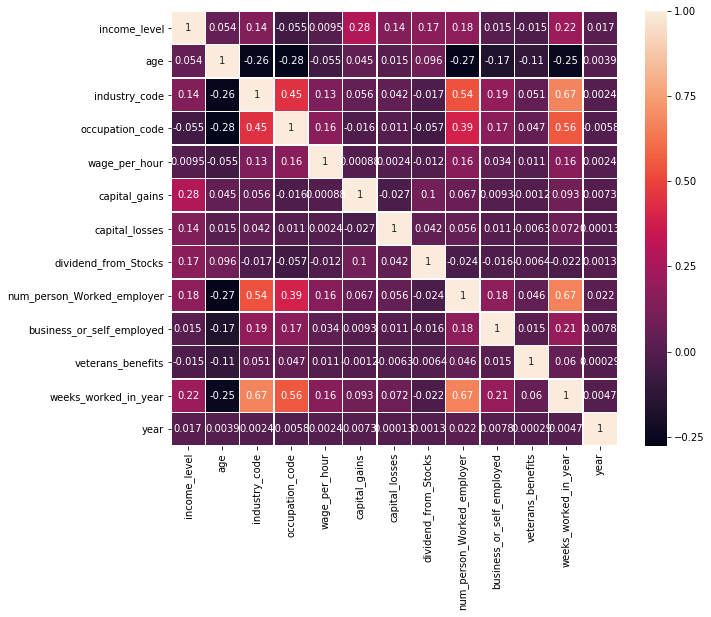

In [34]:
f, ax = plt.subplots(figsize=(10, 8))
corr = data.corr()
sns.heatmap(corr,
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values, annot=True, linewidth=0.5)

The Correlation is the association between two or more variables. The correlation matrix
is used to investigate the dependence between multiple variables at the same time. The
result is a table containing the correlation coefficients between each variable and the
others. 

Each cell in the table shows the correlation between two variables. From the heat map we
can see that not many variables are correlated except weeks worked in year with number of persons worked for employer, occupation code and Industry code

#### Income Distribution ####

<Figure size 432x288 with 0 Axes>

Text(0.5, 1.0, 'Distribution of Income')

Text(0.5, 0, 'Income')

Text(0, 0.5, 'Frequency')

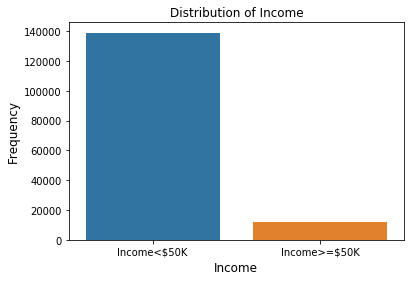

In [35]:
plt.figure(figsize =(6,4));
sns.countplot(x = 'income', data = data);
plt.title('Distribution of Income')
plt.xlabel("Income",fontsize = 12);
plt.ylabel("Frequency",fontsize = 12);
plt.show()

([<matplotlib.patches.Wedge at 0x2504e7425c0>,
 [Text(-0.27214247341023323, -1.065804144374641, 'income<50k'),
  Text(0.3216228936384302, 1.2595867236072487, 'income>=50k')],
 [Text(-0.14844134913285448, -0.5813477151134405, '92.0%'),
  Text(0.19792178070057243, 0.7751302914506145, '8.0%')])

(-1.1076998632464703,
 1.1019851450318723,
 -1.1172830552365738,
 1.3038333211500215)

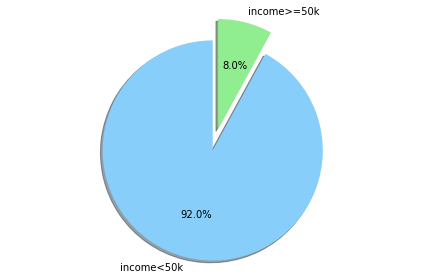

In [36]:
#Set up pie chart
colors = ['lightskyblue', 'lightgreen']
income_status = data.groupby(by='income_level').size().sort_values(ascending=False)
sizes = income_status
labels = ['income<50k', 'income>=50k'] 
explode = (0, 0.2)

plt.pie(sizes, labels=labels,explode=explode, colors=colors, shadow=True, startangle=90, autopct='%1.1f%%')
plt.axis('equal')
plt.tight_layout()
plt.show()

The Pie Chart above depicts the distribution of income across people in the dataset. We
can see that about 92% of the people in the dataset have income less than 50K and 8% of
people in the dataset have income greater than 50K

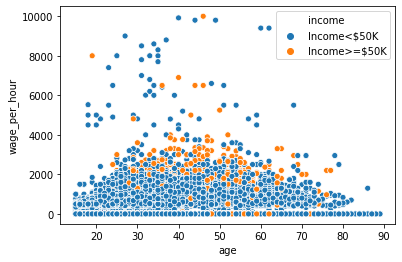

In [37]:
sns.scatterplot(x=data.age, y=data.wage_per_hour, data=data, hue=data.income)

From the above visualizations, it is clear that the data set is an imbalanced data set.

Let us make our data balanced using SMOTE. In SMOTE, the algorithm looks at n nearest neighbors, measures the distance between them and introduces a new observation at the center of n observations.

### Handling the Unbalanced Data ###

The Synthetic Minority Oversampling Technique (SMOTE) is a powerful algorithm that creates artificial data based on feature space (rather than data space) similarities from minority samples. In our case samples with income >= $50K

In [38]:
df = data.copy()
df = pd.get_dummies(data, columns=['class_of_worker','education','enrolled_in_edu_inst_lastwk','marital_status','major_industry_code','major_occupation_code','race','hispanic_origin','sex','member_of_labor_union','reason_for_unemployment','full_parttime_employment_stat','tax_filer_status','region_of_previous_residence','state_of_previous_residence','d_household_family_stat','d_household_summary','live_1_year_ago','family_members_under_18','country_father','country_mother','country_self','citizenship','fill_questionnaire_veteran_admin'])

In [39]:
# Strip  to strip '-' from all the columns.
df.columns = df.columns.str.replace(r"[-]", "_")

In [40]:
df.columns

Index(['income_level', 'age', 'industry_code', 'occupation_code',
       'wage_per_hour', 'capital_gains', 'capital_losses',
       'dividend_from_Stocks', 'num_person_Worked_employer',
       'business_or_self_employed',
       ...
       'country_self_Vietnam', 'country_self_Yugoslavia',
       'citizenship_Foreign born_ Not a citizen of U S',
       'citizenship_Foreign born_ U S citizen by naturalization',
       'citizenship_Native_ Born abroad of American Parents',
       'citizenship_Native_ Born in Puerto Rico or U S Outlying',
       'citizenship_Native_ Born in the United States',
       'fill_questionnaire_veteran_admin_No',
       'fill_questionnaire_veteran_admin_Unknown',
       'fill_questionnaire_veteran_admin_Yes'],
      dtype='object', length=356)

In [41]:
df = df.drop('income',axis=1)
# make a new df made of all the columns, except the target class
X=df.drop('income_level',axis=1)
y=df['income_level']

In [42]:
# for reproducibility purposes
seed = 100
# SMOTE number of neighbors
k = 1

sm = SMOTE(sampling_strategy='auto', k_neighbors=k, random_state=seed)
X_res, y_res = sm.fit_resample(X, y)


new_df = pd.concat([pd.DataFrame(X_res), pd.DataFrame(y_res)], axis=1)

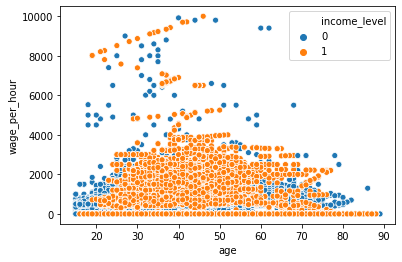

In [43]:
sns.scatterplot(x=new_df.age, y=new_df.wage_per_hour, data=new_df, hue=new_df.income_level)

([<matplotlib.patches.Wedge at 0x250504a0710>,
 [Text(-1.1, 1.3471114790620887e-16, 'income<50k'),
  Text(1.3, -3.1840816777831187e-16, 'income>=50k')],
 [Text(-0.6, 7.347880794884119e-17, '50.0%'),
  Text(0.8, -1.9594348786357652e-16, '50.0%')])

(-1.11, 1.31, -1.1, 1.1)

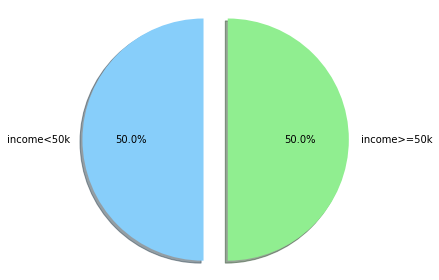

In [44]:
#Set up pie chart
colors = ['lightskyblue', 'lightgreen']
income_status = new_df.groupby(by='income_level').size().sort_values(ascending=False)
sizes = income_status
labels = ['income<50k', 'income>=50k'] 
explode = (0, 0.2)

plt.pie(sizes, labels=labels,explode=explode, colors=colors, shadow=True, startangle=90, autopct='%1.1f%%')
plt.axis('equal')
plt.tight_layout()
plt.show()

In [45]:
data_num_col = census.dtypes[census.dtypes != 'object']
census_counts = data['education'].value_counts()
census_counts

High School                   70906
Some college but no degree    27715
Bachelors degre               19696
Middle School                 11042
Associate Degree               9697
Masters degree                 6464
Elementary School              2549
Prof school degree             1690
Doctorate degree               1227
Name: education, dtype: int64

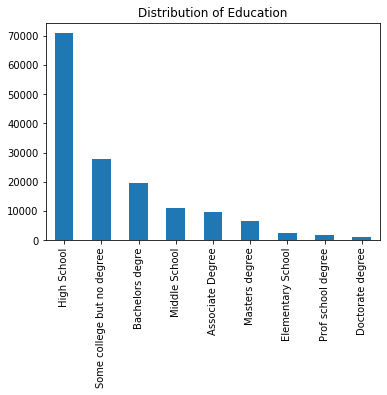

In [46]:
data['education'].value_counts().plot.bar(title="Distribution of Education")

The bar graph below shows that majority of people are high school graduates. There are
almost 70k high school graduates in the dataset.

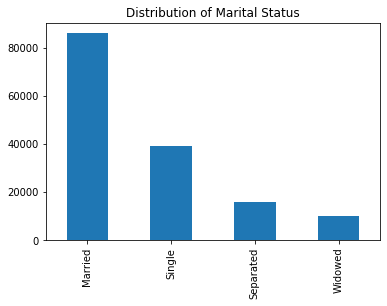

In [47]:
data['marital_status'].value_counts().plot.bar(title="Distribution of Marital Status")

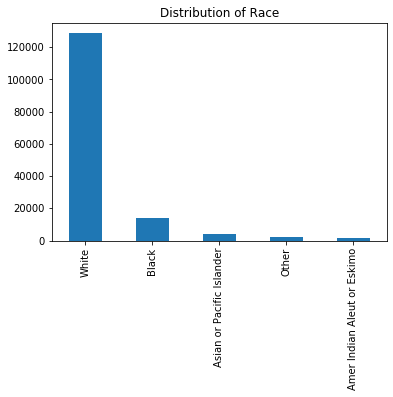

In [48]:
data['race'].value_counts().plot.bar(title="Distribution of Race")

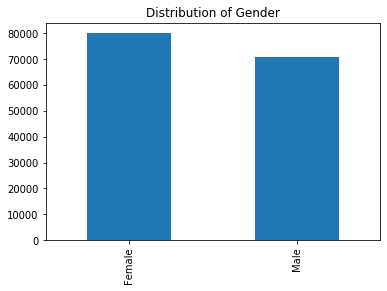

In [49]:
data['sex'].value_counts().plot.bar(title="Distribution of Gender")

The bar graph shows the distribution of gender & race. Most of the people are whites and
the distribution of gender is almost equal between females and males

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000025000182400>]],
      dtype=object)

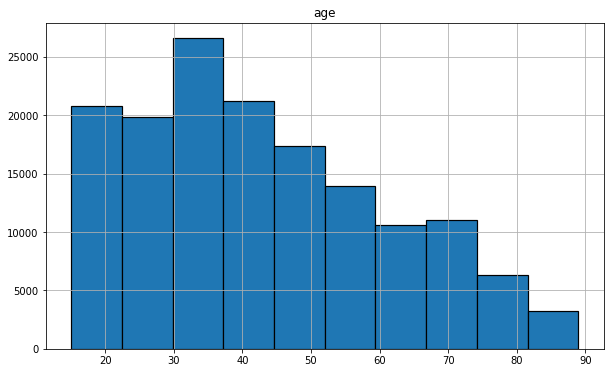

In [50]:
data.hist(column = 'age' ,edgecolor='black', linewidth=1.2, figsize = (10,6))

The bar graphs show distribution of age. From the boxplot we can infer that 55% of the people are between age 28 – 55 years. The median age in the dataset is
around 40 

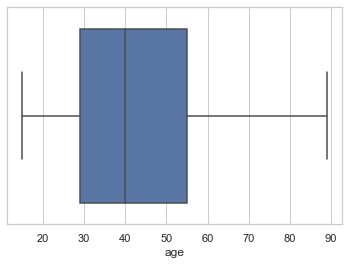

In [51]:
sns.set(style="whitegrid")
ax = sns.boxplot(x=data["age"])

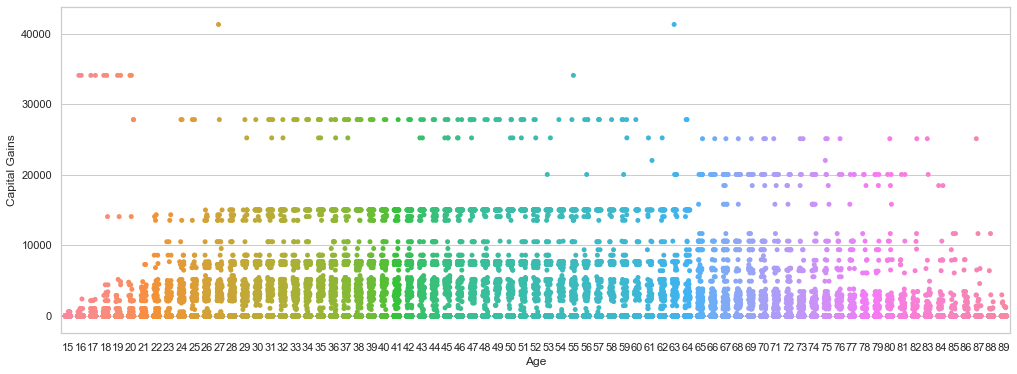

In [52]:
fig = plt.figure(figsize = (17,6))

sns.stripplot('age','capital_gains', data = data,
         jitter = 0.2);
plt.xlabel('Age',fontsize = 12);
plt.ylabel('Capital Gains',fontsize = 12);

From the above Strip Plot, we see that between age 26 and age 64 capital gain is around 15K and after that it decreases.

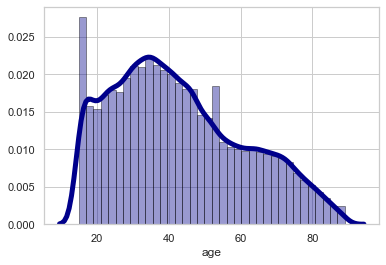

In [53]:
sns.distplot(data['age'], hist=True, kde=True, 
             bins=int(180/5), color = 'darkblue', 
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 5})

In [54]:
age_race_rel = data[['weeks_worked_in_year','race','age']]
age_race_rel.head()

,weeks_worked_in_year,race,age
0,0,White,73
1,52,White,58
2,0,Asian or Pacific Islander,18
5,52,Amer Indian Aleut or Eskimo,48
6,52,White,42


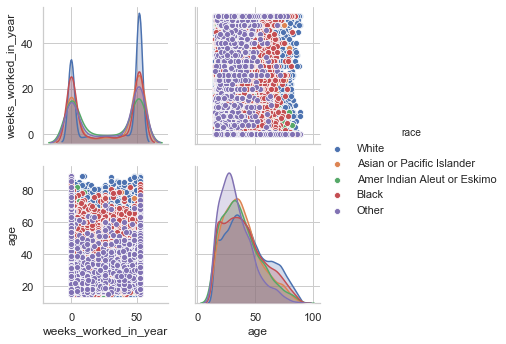

In [55]:
sns.pairplot(age_race_rel, hue='race')

The pairs plot builds on two basic figures, the density and the scatter plot. The density on the diagonal allows us to see the distribution of a single variable while the scatter plots on the upper and lower triangles show the relationship between two variables. 

The left-most plot in the second row shows the scatter plot of weeks worked per year versus age.

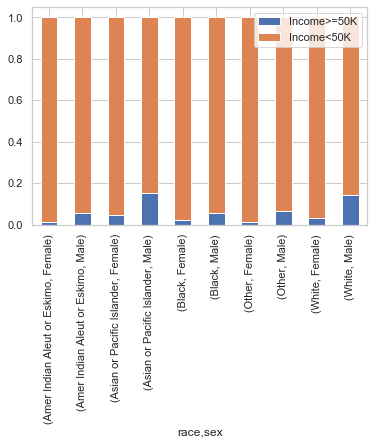

In [56]:
#stacked bar to show Income values between SEX and RACE
df_g = data.groupby(['race', 'sex'])['income_level'].agg([np.mean, lambda x: 1-np.mean(x)])
df_g.columns = ['Income>=50K', 'Income<50K']
df_g.plot.bar(stacked=True)

This stacked bar graphs shows the income based on gender & race. From the graph we can see that males earn more than 50k per annum whereas most of the females earn less than 50K per annum.

Text(0.5, 1.0, 'Income controlled by Age and Gender')

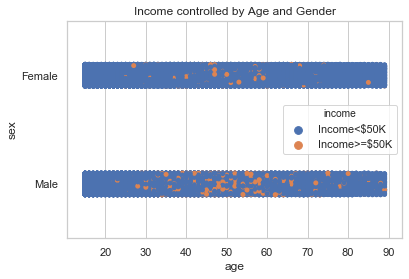

In [57]:
# Question? how can we change hue

ax = sns.stripplot(x='age', y='sex', data=data,hue='income')
ax.set_title('Income controlled by Age and Gender')

There is a greater distribution of income>50k among males between age 30 – 65, whereas there is a moderate distribution of income>50k among females between age 45 – 60 which clearly indicates that gender pay gap is larger for aged workers.


In [58]:
data.columns

Index(['income_level', 'age', 'class_of_worker', 'industry_code',
       'occupation_code', 'education', 'wage_per_hour',
       'enrolled_in_edu_inst_lastwk', 'marital_status', 'major_industry_code',
       'major_occupation_code', 'race', 'hispanic_origin', 'sex',
       'member_of_labor_union', 'reason_for_unemployment',
       'full_parttime_employment_stat', 'capital_gains', 'capital_losses',
       'dividend_from_Stocks', 'tax_filer_status',
       'region_of_previous_residence', 'state_of_previous_residence',
       'd_household_family_stat', 'd_household_summary', 'live_1_year_ago',
       'num_person_Worked_employer', 'family_members_under_18',
       'country_father', 'country_mother', 'country_self', 'citizenship',
       'business_or_self_employed', 'fill_questionnaire_veteran_admin',
       'veterans_benefits', 'weeks_worked_in_year', 'year', 'income'],
      dtype='object')

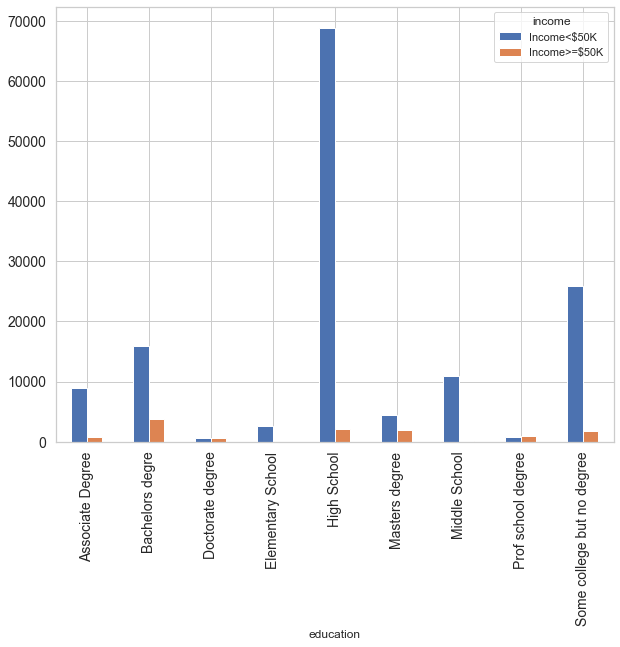

In [59]:
data.groupby(["education","income"]).size().unstack("income").plot(kind="bar",fontsize=14,figsize=(10, 8))

The graph shows that if a person has a Bachelor’s Degree, then there is a high probability of earning income more than 50k compared to others.

In [60]:
income_occupation = pd.crosstab(data['major_occupation_code'], data['income'])
income_workclass = pd.crosstab(data['class_of_worker'], data['income'])
income_edu = pd.crosstab(data['education'], data['income'])
income_marital = pd.crosstab(data['marital_status'], data['income'])
income_race = pd.crosstab(data['race'], data['income'])
income_sex = pd.crosstab(data['sex'], data['income'])

In [61]:
def graph_attributes(df1,df2,x1,x2,y):
    fig = plt.figure(figsize = (17,6))

    ax = fig.add_subplot(1,2,1)
    (df1.div(df1.sum(axis= 1),axis = 0)*100).sort_values(by= 'Income<$50K').plot(kind = 'bar',ax=ax);
    plt.xlabel(x1,fontsize = 14);
    plt.ylabel(y,fontsize = 14);


    ax = fig.add_subplot(1,2,2)
    (df2.div(df2.sum(axis = 1),axis = 0)*100).sort_values(by = 'Income<$50K').plot(kind = 'bar',ax=ax);
    plt.xlabel(x2,fontsize = 14);

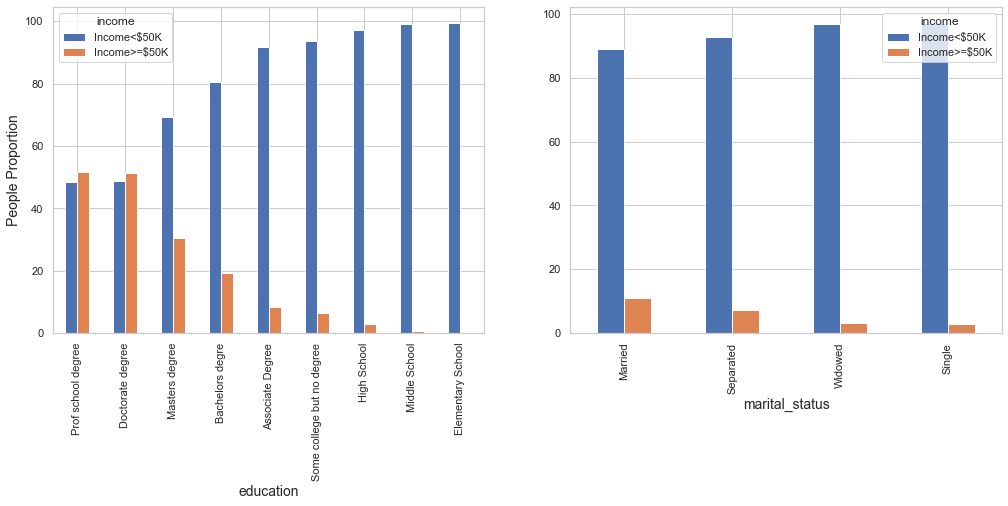

In [62]:
graph_attributes(income_edu, income_marital,'education','marital_status', 'People Proportion')

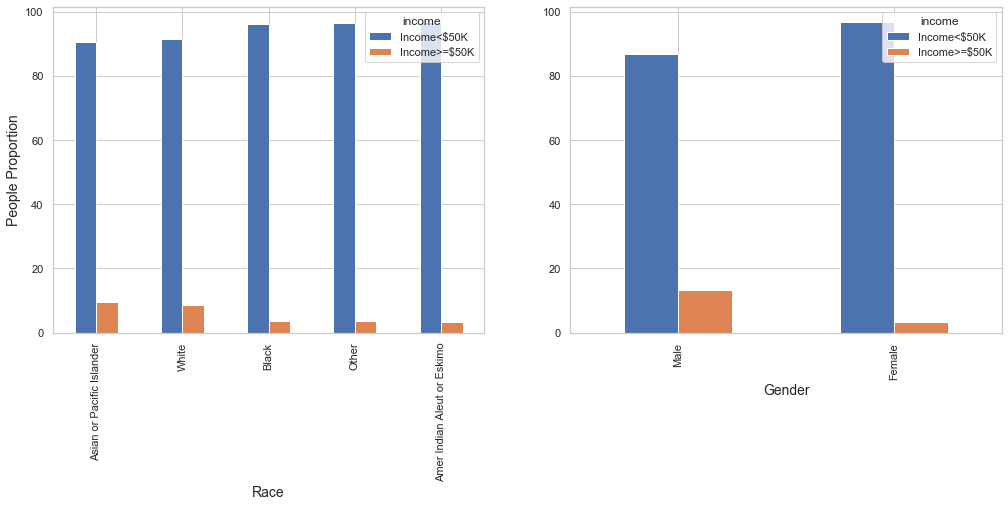

In [63]:
graph_attributes(income_race, income_sex,'Race','Gender', 'People Proportion')

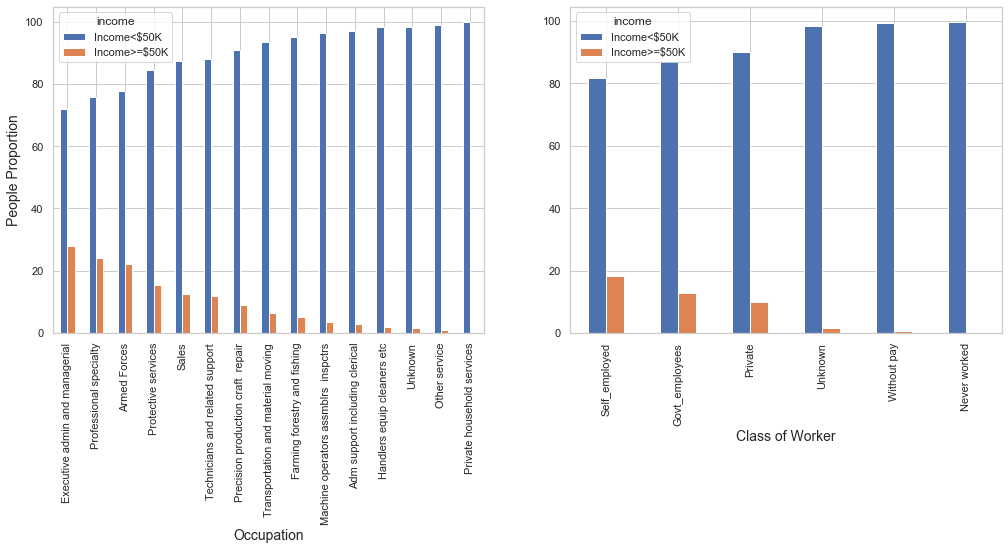

In [64]:
graph_attributes(income_occupation, income_workclass,'Occupation','Class of Worker', 'People Proportion')

##### Summary####

**Gender**: Out of total male 15% of them earn salary more than 50K while less than 5% female earn more than 50K. 95% female earn less than 50K

**Race**: White and asian-pacific-Islander earn salary more than 50K

**Education**: People having doctorate,professional school, and masters are making salary more than 50K.

**Class of Worker**: Out of all the workclass only 18% self employed people are making salary more than 50K.

**Income**: Proportion of people making salary less than 50K is higher.

### Model Evaluation ###

In [65]:
df2 = new_df.copy()

In [66]:
df2.head()

,age,industry_code,occupation_code,wage_per_hour,capital_gains,capital_losses,dividend_from_Stocks,num_person_Worked_employer,business_or_self_employed,veterans_benefits,weeks_worked_in_year,year,class_of_worker_Govt_employees,class_of_worker_Never worked,class_of_worker_Private,class_of_worker_Self_employed,class_of_worker_Unknown,class_of_worker_Without pay,education_Associate Degree,education_Bachelors degre,education_Doctorate degree,education_Elementary School,education_High School,education_Masters degree,education_Middle School,education_Prof school degree,education_Some college but no degree,enrolled_in_edu_inst_lastwk_College or university,enrolled_in_edu_inst_lastwk_High school,enrolled_in_edu_inst_lastwk_Unknown,marital_status_Married,marital_status_Separated,marital_status_Single,marital_status_Widowed,major_industry_code_Agriculture,major_industry_code_Armed Forces,major_industry_code_Business and repair services,major_industry_code_Communications,major_industry_code_Construction,major_industry_code_Education,major_industry_code_Entertainment,major_industry_code_Finance insurance and real estate,major_industry_code_Forestry and fisheries,major_industry_code_Hospital services,major_industry_code_Manufacturing_durable goods,major_industry_code_Manufacturing_nondurable goods,major_industry_code_Medical except hospital,major_industry_code_Mining,major_industry_code_Other professional services,major_industry_code_Personal services except private HH,major_industry_code_Private household services,major_industry_code_Public administration,major_industry_code_Retail trade,major_industry_code_Social services,major_industry_code_Transportation,major_industry_code_Unknown,major_industry_code_Utilities and sanitary services,major_industry_code_Wholesale trade,major_occupation_code_Adm support including clerical,major_occupation_code_Armed Forces,major_occupation_code_Executive admin and managerial,major_occupation_code_Farming forestry and fishing,major_occupation_code_Handlers equip cleaners etc,major_occupation_code_Machine operators assmblrs inspctrs,major_occupation_code_Other service,major_occupation_code_Precision production craft repair,major_occupation_code_Private household services,major_occupation_code_Professional specialty,major_occupation_code_Protective services,major_occupation_code_Sales,major_occupation_code_Technicians and related support,major_occupation_code_Transportation and material moving,major_occupation_code_Unknown,race_Amer Indian Aleut or Eskimo,race_Asian or Pacific Islander,race_Black,race_Other,race_White,hispanic_origin_All other,hispanic_origin_Central or South American,hispanic_origin_Chicano,hispanic_origin_Cuban,hispanic_origin_Do not know,hispanic_origin_Mexican,hispanic_origin_Mexican_American,hispanic_origin_Other Spanish,hispanic_origin_Puerto Rican,sex_Female,sex_Male,member_of_labor_union_No,member_of_labor_union_Unknown,member_of_labor_union_Yes,reason_for_unemployment_Job leaver,reason_for_unemployment_Job loser _ on layoff,reason_for_unemployment_New entrant,reason_for_unemployment_Other job loser,reason_for_unemployment_Re_entrant,reason_for_unemployment_Unknown,full_parttime_employment_stat_Children or Armed Forces,full_parttime_employment_stat_Full_time schedules,full_parttime_employment_stat_Not in labor force,full_parttime_employment_stat_PT for econ reasons usually FT,full_parttime_employment_stat_PT for econ reasons usually PT,full_parttime_employment_stat_PT for non_econ reasons usually FT,full_parttime_employment_stat_Unemployed full_time,full_parttime_employment_stat_Unemployed part_ time,tax_filer_status_Head of household,tax_filer_status_Joint Filer,tax_filer_status_Nonfiler,tax_filer_status_Single,region_of_previous_residence_Abroad,region_of_previous_residence_Midwest,region_of_previous_residence_Northeast,region_of_previous_residence_South,region_of_previous_residence_Unknown,region_of_previous_residence_West,state_of_previous_residence_Abroad,state_of_previous_resi

In [67]:
df2.shape

(277942, 355)

#### Checking Accuracy of Data using Machine Learning Models ####

In [68]:
X=df2.drop('income_level',axis=1)
y=df2.income_level

In [69]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size =0.25,random_state = 38)

In [70]:
X_train.shape
X_test.shape

(208456, 354)

(69486, 354)

In [71]:
#Instantiate the classifiers
clf_logreg = LogisticRegression()
clf_tree = DecisionTreeClassifier()
clf_knn =  KNeighborsClassifier()
clf_svc = SVC()
clf_forest = RandomForestClassifier()
clf_xgb = XGBClassifier()
clf_ada = AdaBoostClassifier()
clf_bagging = BaggingClassifier()
clf_grb = GradientBoostingClassifier()
clf_extratrees = ExtraTreesClassifier()
clf_gnb = GaussianNB()

In [72]:
#classifiers = ['LogisticRegression', 'DecisionTree', 'KNN', 'SVC', 'RandomForest', 'Adaboost', 'Bagging','GradientBoost', 'Extratrees', 'Naive']
classifiers = ['LogisticRegression', 'DecisionTree', 'KNN', 'XGBoost', 'RandomForest', 'Adaboost', 'Bagging','GradientBoost', 'Extratrees', 'Naive']

In [73]:
models = {clf_logreg:'LogisticRegression',
          clf_tree:'DecisionTree',
          clf_knn: 'KNN',
          #clf_svc: 'SVC',
          clf_xgb: 'XGBoost',
          clf_forest: 'RandomForest',
          clf_ada: 'Adaboost',
          clf_bagging: 'Bagging',
          clf_grb: 'GradientBoost',
          clf_extratrees:'Extratrees' ,
          clf_gnb: 'Naive'
         }

In [74]:
# Define train function fits the model and returns accuracy score
def train(algo,name,X_train,y_train,X_test,y_test):
    algo.fit(X_train,y_train)
    y_pred = algo.predict(X_test)
    score = accuracy_score(y_test,y_pred)
    print(f"--------------------------------------------{name}---------------------------------------------------")
    print(f"Accuracy Score for {name}: {score*100:.4f}%")
    return y_test,y_pred,score

# acc_res function calculates confusion matrix
def acc_res(y_test,y_pred):
    print("\n Confusion Matrix")
    matrix = confusion_matrix(y_test,y_pred)
    cm = pd.DataFrame(
    confusion_matrix(y_test, y_pred),
    columns=['Predicted Income <50k', 'Predicted Income >50k'],
    index=['True Income <50k', 'True Income >50k']
    )
    print("+++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++")
    print(cm)
    print("+++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++")
    TN = matrix[0,0]
    FP = matrix[0,1]
    FN = matrix[1,0]
    TP = matrix[1,1]
    accuracy_score=(TN+TP) / float(TP+TN+FP+FN)
    recall_score = (TP)/ float(TP+FN)
    specificity = TN / float(TN+FP)
    FPR = FP / float(FP+TN)
    precision_score = TP / float(TP+FP)
    f_score = 2 * (precision_score * recall_score)/ (precision_score + recall_score)
    print(f"Accuracy Score: {accuracy_score*100:.4f}%")
    print(f"Recall Score (Sensitivity): {recall_score*100:.4f}%")
    print(f"Specificity Score: {specificity*100:.4f}%")
    print(f"False Positive Rate: {FPR*100:.4f}%")
    print(f"Precision Score: {precision_score*100:.4f}%")    
    print(f"F-Score: {f_score*100:.4f}%")
    print("+++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++")
    print("Classification Report")
    print(classification_report(y_test,y_pred))
    current_time = datetime.now()
    
def main(models):
    accuracy_scores = []
    for algo,name in models.items():
        current_time = datetime.now()
        y_test_train,y_pred,acc_score = train(algo,name,X_train,y_train,X_test,y_test)
        acc_res(y_test_train,y_pred)
        accuracy_scores.append(acc_score)
        time_taken = datetime.now() - current_time
        print(f"Time Taken for {name} model: (hh:mm:ss.ms) {time_taken}")
    return accuracy_scores
    

In [75]:
# model1={clf_logreg:'LogisticRegression'}
# accuracy_scores = main(model1)
accuracy_scores = main(models)

--------------------------------------------LogisticRegression---------------------------------------------------
Accuracy Score for LogisticRegression: 81.7805%

 Confusion Matrix
+++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
                  Predicted Income <50k  Predicted Income >50k
True Income <50k                  26636                   8106
True Income >50k                   4554                  30190
+++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
Accuracy Score: 81.7805%
Recall Score (Sensitivity): 86.8927%
Specificity Score: 76.6680%
False Positive Rate: 23.3320%
Precision Score: 78.8333%
F-Score: 82.6670%
+++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
Classification Report
              precision    recall  f1-score   support

           0       0.85      0.77      0.81     34742
           1       0.79      0.87      0.83     34744

    accuracy                           0.82     6948

--------------------------------------------Extratrees---------------------------------------------------
Accuracy Score for Extratrees: 96.2395%

 Confusion Matrix
+++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
                  Predicted Income <50k  Predicted Income >50k
True Income <50k                  33998                    744
True Income >50k                   1869                  32875
+++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
Accuracy Score: 96.2395%
Recall Score (Sensitivity): 94.6207%
Specificity Score: 97.8585%
False Positive Rate: 2.1415%
Precision Score: 97.7870%
F-Score: 96.1778%
+++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
Classification Report
              precision    recall  f1-score   support

           0       0.95      0.98      0.96     34742
           1       0.98      0.95      0.96     34744

    accuracy                           0.96     69486
   macro avg   

In [76]:
pd.DataFrame(accuracy_scores,columns = ['Accuracy Scores'],index = classifiers).sort_values(by = 'Accuracy Scores',
                                                                                            ascending = False)

,Accuracy Scores
RandomForest,0.967
Bagging,0.964
Extratrees,0.962
DecisionTree,0.952
KNN,0.931
GradientBoost,0.928
Adaboost,0.928
XGBoost,0.928
LogisticRegression,0.818
Naive,0.790


In [77]:
models_new = {clf_forest: 'RandomForest', 
              clf_bagging: 'Bagging',
              clf_extratrees: 'Extratrees',}

classifiers_new = models_new.values()

K-fold cross validation divides data into k folds and uses k-1 folds for training and k folds for testing. Eventually all the data gets used for training and testing.

In [78]:
mean_score = []
for model,value in models_new.items():
    start_time = datetime.now()
    scores = cross_val_score(model,X_train,y_train,scoring = 'accuracy',cv = 10)
    elapsed_time = datetime.now() - start_time
    print(f"Time taken to complete training {value} model: (hh:mm:ss.ms) {elapsed_time}")
    mean_score.append(scores.mean())

Time taken to complete training RandomForest model: (hh:mm:ss.ms) 0:13:14.826780
Time taken to complete training Bagging model: (hh:mm:ss.ms) 0:12:48.275843
Time taken to complete training Extratrees model: (hh:mm:ss.ms) 0:18:51.881961


In [79]:
pd.DataFrame(mean_score,index = classifiers_new,
             columns = ['Accuracy Score']).sort_values(by = 'Accuracy Score', ascending = False)

,Accuracy Score
RandomForest,0.967
Bagging,0.963
Extratrees,0.963


In [80]:

# Definine outcome and predictors.
# Set our outcome to 0 and 1.
X=df2.drop('income_level',axis=1)
y=df2['income_level']


# Create training and test sets.
offset = int(X.shape[0] * 0.67)

# Put 67% of the data in the training set.
X_train, y_train = X[:offset], y[:offset]

# And put 33% in the test set.
X_test, y_test = X[offset:], y[offset:]


In [81]:
# Initialize and fit the model.
rf = RandomForestClassifier(random_state=42)


rf.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=42, verbose=0,
                       warm_start=False)

In [83]:
param_grid = { 
    'n_estimators': [70, 100],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth' : [60,80],
    'criterion' :['gini', 'entropy']
}

# Instantiate the grid search model
grid = GridSearchCV(estimator = rf, param_grid = param_grid, 
                          cv = 10, n_jobs = -1, verbose = 2)
grid.fit(X_train, y_train)

Fitting 10 folds for each of 24 candidates, totalling 240 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed: 15.2min
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed: 64.9min
[Parallel(n_jobs=-1)]: Done 240 out of 240 | elapsed: 101.4min finished


GridSearchCV(cv=10, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                              oob_score=False, random_state=42,
                                 

In [85]:
grid.best_params_

{'criterion': 'gini',
 'max_depth': 60,
 'max_features': 'auto',
 'n_estimators': 100}

In [86]:
best_grid = grid.best_estimator_

print("Number of estimators:",best_grid.get_params()['n_estimators'])

Number of estimators: 100


In [88]:
best_rf = RandomForestClassifier(random_state=42, max_features='auto', n_estimators= 100, max_depth=60, criterion='gini')
best_rf.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=60, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=42, verbose=0,
                       warm_start=False)

In [89]:
pred = best_rf.predict(X_test)
print("Accuracy for Random Forest using Best Params: ",accuracy_score(y_test,pred))

Accuracy for Random Forest using Best Params:  0.9978194742752478


param_grid = {
    'bootstrap': [True],
    'max_depth': [80, 90, 100, 110],
    'max_features': [2, 3],
    'min_samples_leaf': [3, 4, 5],
    'min_samples_split': [8, 10, 12],
    'n_estimators': [100, 200, 300, 1000]
}

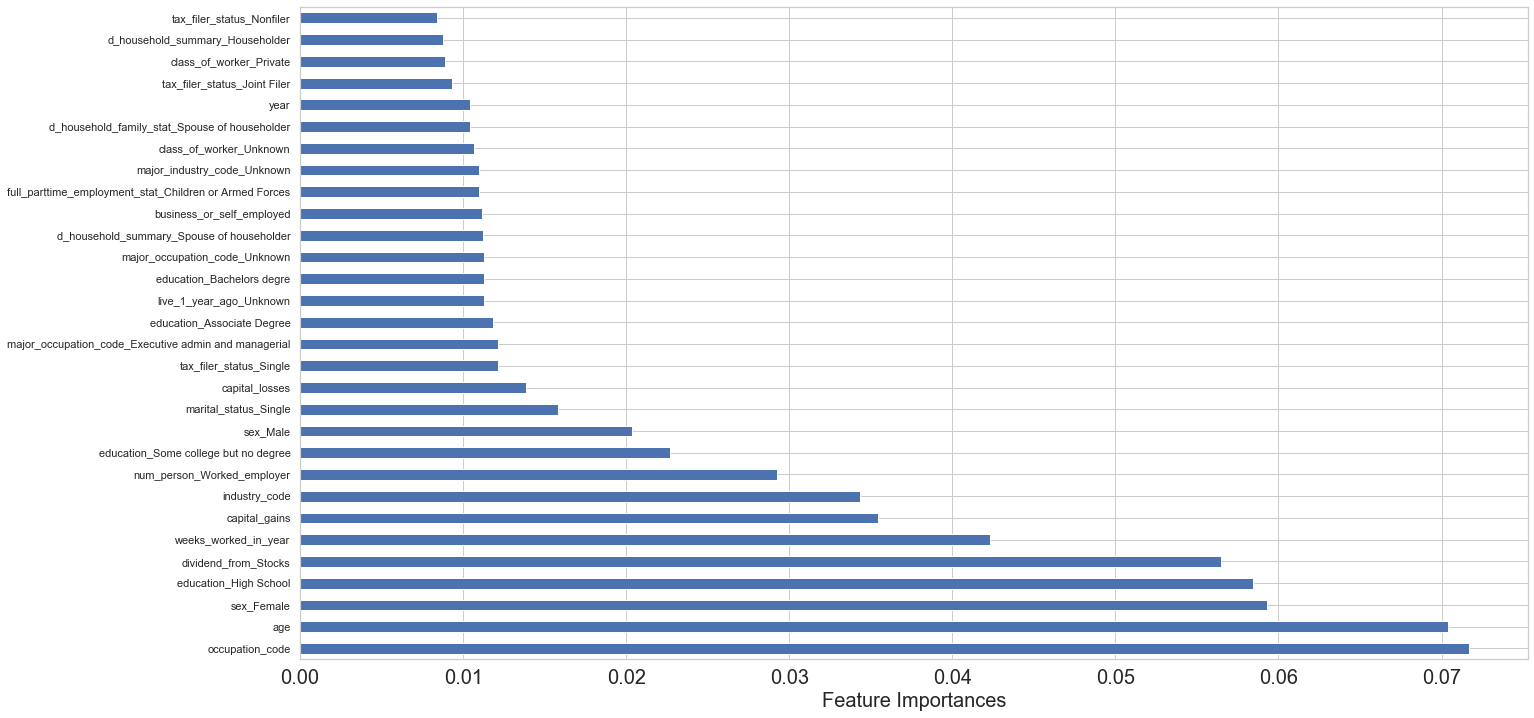

In [92]:
gb_mod  = best_grid
plt.figure(figsize = (22,12))
(pd.Series(gb_mod.feature_importances_, index=X_train.columns).nlargest(30).plot(kind='barh')); 
plt.xlabel('Feature Importances',fontsize = 20);
plt.xticks(fontsize = 20);

### Conclusion

When we take other parameters like accuracy, sensitivity, specificity into
consideration, we can certainly say that gradient boost model is better fit to predict the income
of an individual based on the census data. 

### Practical Uses of the Model:

Spreading awareness among schools and colleges to maintain gender equality
during on-campus placements
- Establish structures, policies, objectives in every organization to ensure gender balance and pay quity.
- This analysis can be useful to the banks or other financial institutes to know the american salary distribution and target potential borrowers and segment them appropriately.

### Future Research Considerations

May consider doing additional analysis that focuses on dimension reduction such as Prinicipal Component Analysis (PCA) or Linear Discriminant Analysis (LDA).

Since this data set represents classification problem, LDA can be used as a preprocessing step in Machine Learning and
pattern classification applications.

### References: ###

[Census Income Data Set](http://archive.ics.uci.edu/ml/machine-learning-databases/census-income-mld/)

[SMOTE](https://kite.com/blog/python/smote-python-imbalanced-learn-for-oversampling/)

[Benchmark Oversampling Methods](https://imbalanced-learn.readthedocs.io/en/stable/auto_examples/applications/plot_over_sampling_benchmark_lfw.html)

[Practical Guide Imbalanced Data](https://www.analyticsvidhya.com/blog/2016/03/practical-guide-deal-imbalanced-classification-problems/)

[XGBoost Algorithm](https://www.programcreek.com/python/example/99824/xgboost.XGBClassifier)

[Hyperparameter Tuning](https://towardsdatascience.com/hyperparameter-tuning-the-random-forest-in-python-using-scikit-learn-28d2aa77dd74)

[Random Forest using GridSearchCV](https://www.kaggle.com/sociopath00/random-forest-using-gridsearchcv)